In [40]:
from error_prop_tools import *
import pyzx as zx
import numpy as np
import scipy as sp
import sympy as sy
import random
import matplotlib.pyplot as plt
from fractions import Fraction
import quimb.tensor as qtn
import pprint as pp

--- Generated Grid Map for d=3 ---
[[0, 0, 'X0', 0, 0, 0, 0],
 [0, 'd0', 0, 'd1', 0, 'd2', 0],
 [0, 0, 'Z0', 0, 'X1', 0, 'Z1'],
 [0, 'd3', 0, 'd4', 0, 'd5', 0],
 ['Z2', 0, 'X2', 0, 'Z3', 0, 0],
 [0, 'd6', 0, 'd7', 0, 'd8', 0],
 [0, 0, 0, 0, 'X3', 0, 0]]


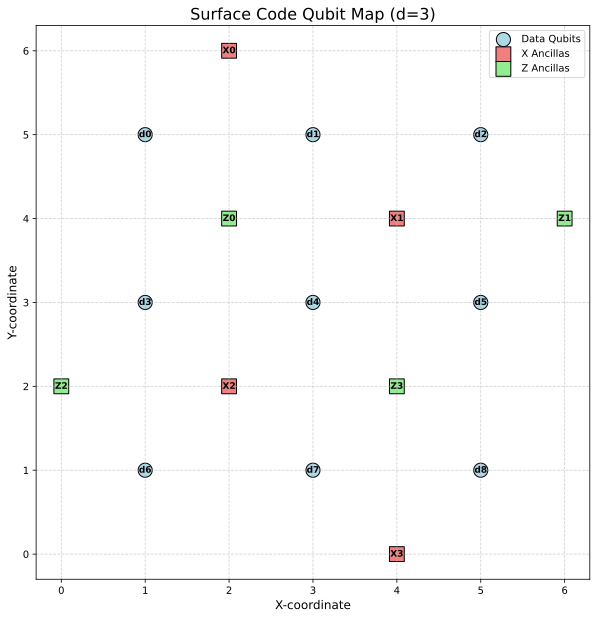


--- Generated PyZX Qubit Map (Corrected Coordinates) ---
{0: (1, 1),
 1: (1, 3),
 2: (1, 5),
 3: (3, 1),
 4: (3, 3),
 5: (3, 5),
 6: (5, 1),
 7: (5, 3),
 8: (5, 5),
 9: (0, 2),
 10: (2, 2),
 11: (2, 4),
 12: (2, 6),
 13: (4, 0),
 14: (4, 2),
 15: (4, 4),
 16: (6, 4),
 17: (3, 2)}


In [41]:
DISTANCE = 3

_, sorted_ancillas = generate_pyzx_and_plot_rotated_code(DISTANCE)

print("\n--- Generated PyZX Qubit Map (Corrected Coordinates) ---")

pyzx_map_rotated = {2: (1, 5),
                    5: (3, 5),
                    8: (5, 5),
                    1: (1, 3),
                    4: (3, 3),
                    7: (5, 3),
                    0: (1, 1),
                    3: (3, 1),
                    6: (5, 1),
                    12: (2, 6),
                    11: (2, 4),
                    15: (4, 4),
                    16: (6, 4),
                    9: (0, 2),
                    10: (2, 2),
                    14: (4, 2),
                    13: (4, 0),
                    17: (3, 2),
                    }

pprint.pprint(pyzx_map_rotated)

In [42]:
default_qasm_string = generate_surface_code_qasm(DISTANCE)

custom_orders = {
    'Z0': [1, 2, 0, 3],
    'X1': [1, 2, 0, 3],
    'X2': [1, 2, 0, 3],
    'Z3': [1, 2, 0, 3]
}
custom_qasm_string = generate_surface_code_qasm(DISTANCE, custom_cnot_orderings=custom_orders)

In [43]:
print(custom_qasm_string)

// Surface Code d=3
OPENQASM 2.0;
include "qelib1.inc";
qreg q[9];
qreg a[8];

// Stabilizer for X0 (a[0])
h a[0];
cx a[0], q[0];
cx a[0], q[1];
h a[0];

// Stabilizer for Z0 (a[1])
// Using custom CNOT order: [1, 2, 0, 3]
cx q[1], a[1];
cx q[3], a[1];
cx q[0], a[1];
cx q[4], a[1];

// Stabilizer for X1 (a[2])
// Using custom CNOT order: [1, 2, 0, 3]
h a[2];
cx a[2], q[2];
cx a[2], q[4];
cx a[2], q[1];
cx a[2], q[5];
h a[2];

// Stabilizer for Z1 (a[3])
cx q[2], a[3];
cx q[5], a[3];

// Stabilizer for Z2 (a[4])
cx q[3], a[4];
cx q[6], a[4];

// Stabilizer for X2 (a[5])
// Using custom CNOT order: [1, 2, 0, 3]
h a[5];
cx a[5], q[4];
cx a[5], q[6];
cx a[5], q[3];
cx a[5], q[7];
h a[5];

// Stabilizer for Z3 (a[6])
// Using custom CNOT order: [1, 2, 0, 3]
cx q[5], a[6];
cx q[7], a[6];
cx q[4], a[6];
cx q[8], a[6];

// Stabilizer for X3 (a[7])
h a[7];
cx a[7], q[7];
cx a[7], q[8];
h a[7];



In [44]:
g = zx.sqasm(default_qasm_string, simplify=False)
zx.id_simp(g)
zx.draw(g, True)
g.map_qubits(pyzx_map_rotated)
zx.draw(g, True)

trying to get sample for stabilizer measurments

In [45]:
init_err = [((35, 37), 'X'),((61, 63), 'Z')]
errors1, log = PropagatePauliError(g, init_err)
print(log)
zx.draw(g, True, pauli_web=errors1)

['Z-web for output 73: commutes', 'X-web for output 73: commutes', 'Z-web for output 74: commutes', 'X-web for output 74: commutes', 'Z-web for output 75: commutes', 'X-web for output 75: commutes', 'Z-web for output 76: commutes', 'X-web for output 76: commutes', 'Z-web for output 77: anti-commutes, added X', 'X-web for output 77: commutes', 'Z-web for output 78: anti-commutes, added X', 'X-web for output 78: commutes', 'Z-web for output 79: commutes', 'X-web for output 79: commutes', 'Z-web for output 80: commutes', 'X-web for output 80: anti-commutes, added Z', 'Z-web for output 81: commutes', 'X-web for output 81: anti-commutes, added Z', 'Z-web for output 82: commutes', 'X-web for output 82: commutes', 'Z-web for output 83: commutes', 'X-web for output 83: commutes', 'Z-web for output 84: commutes', 'X-web for output 84: anti-commutes, added Z', 'Z-web for output 85: anti-commutes, added X', 'X-web for output 85: commutes', 'Z-web for output 86: commutes', 'X-web for output 86: co

In [46]:
output_errors = get_output_errors(g, errors1)
output_errors

{77: 'X', 78: 'X', 80: 'Z', 81: 'Z', 84: 'Z', 85: 'X', 88: 'Z'}

In [47]:
for k in output_errors.keys():
    print(f"Output error on qubit {g.qubit(k)}: {output_errors[k]}")

Output error on qubit 10.8: X
Output error on qubit 12.0: X
Output error on qubit 16.8: Z
Output error on qubit 18.0: Z
Output error on qubit 8.4: Z
Output error on qubit 9.6: X
Output error on qubit 14.4: Z


In [48]:
g.apply_effect('/////////00000000')
g.apply_state('/////////00000000')
zx.draw(g, True, pauli_web=errors1)

In [49]:
encoder = zx.Graph()
for i in range(9):
    a = encoder.add_vertex(zx.VertexType.X, qubit = i, row = 1, phase=0)
    b = encoder.add_vertex(zx.VertexType.BOUNDARY, qubit = i, row = 2, phase=0)
    encoder.add_edge((a, b))
for i in [10, 12, 13, 15]:
    a = encoder.add_vertex(zx.VertexType.Z, qubit = i , row = 1, phase=0)

#Z0
encoder.add_edge((18, 0))
encoder.add_edge((18, 2))
encoder.add_edge((18, 6))
encoder.add_edge((18, 8))
#Z1
encoder.add_edge((19, 4))
encoder.add_edge((19, 10))

#Z2
encoder.add_edge((20, 6))
encoder.add_edge((20, 12))

#Z3
encoder.add_edge((21, 8))
encoder.add_edge((21, 10))
encoder.add_edge((21, 14))
encoder.add_edge((21, 16))

#logical input
in0 = encoder.add_vertex(zx.VertexType.Z, qubit = 17, row = 0, phase=0)
in1 = encoder.add_vertex(zx.VertexType.BOUNDARY, qubit = 17, row = -1, phase=0)
encoder.add_edge((in0, in1))

encoder.add_edge((in0, 0))
encoder.add_edge((in0, 6))
encoder.add_edge((in0, 12))

#map n draw
encoder.set_outputs([1, 3, 5, 7, 9, 11, 13, 15, 17])
encoder.map_qubits(pyzx_map_rotated)
encoder_c = encoder.copy()
zx.draw(encoder, True)

In [50]:
decoder = encoder.copy().adjoint()
zx.draw(decoder, True)

In [51]:
if True:    
    for v in [0, 2, 4]:
        encoder.set_phase(v, 1)
encoder.compose(g)
encoder.compose(decoder)
zx.draw(encoder, True)

zx.full_reduce(encoder)
zx.draw(encoder)

In [52]:
g = zx.sqasm(default_qasm_string, simplify=False)
zx.id_simp(g)
g.map_qubits(pyzx_map_rotated)
g.apply_effect('/////////00000000')
g.compose(decoder)
order, zwebs, xwebs = compute_pauli_webs(g)

In [53]:
zx.draw(g, True, pauli_web=zwebs[103])
zx.draw(g, True, pauli_web=xwebs[98])
zx.draw(g, True, pauli_web=xwebs[41])

In [54]:
import pyzx as zx
s = """
qreg A[1];
qreg q[4];


cx q[0], A[0];
cx q[1], A[0];
cx q[2], A[0];
cx q[3], A[0];
"""

g = zx.sqasm(s, simplify=False)
g.set_type(13, zx.VertexType.X)
# g.set_phase(13, 1)
# zx.full_reduce(g)
zx.draw(g, True)

In [55]:
g = zx.sqasm(default_qasm_string, simplify=False)
zx.id_simp(g)
g.map_qubits(pyzx_map_rotated)
zx.draw(g, True)

encoder_cc = encoder_c.copy()
stab_round = g.copy()
stab_round.apply_state('/////////00000000')
symbols = sy.symbols('x0 z0 x1 z1 z2 x2 z3 x3')
zx.draw(encoder_c, True)

encoder_cc.compose(stab_round)
encoder_cc.set_inputs([23])
encoder_cc.apply_state('0')

gg = zx.pauliweb.PauliWeb.random(encoder_cc)
errors=gg.graph_with_errors()

rho = errors.adjoint()+errors

outs = rho.outputs()
ins = rho.inputs()

for i in range(9):
    rho.set_type(outs[i], zx.VertexType.Z)
    rho.set_type(ins[i], zx.VertexType.Z)
    rho.add_edge((outs[i], ins[i]))
    
zx.draw(rho, True)
zx.full_reduce(rho)
rho.normalize()
zx.simplify.id_simp(rho)
zx.draw(rho, True)   
pp.pprint(np.diag(rho.to_matrix(preserve_scalar=True)))

array([0.00097656+0.j, 0.00097656+0.j, 0.00097656+0.j, 0.00097656+0.j,
       0.00097656+0.j, 0.00097656+0.j, 0.00097656+0.j, 0.00097656+0.j,
       0.00097656+0.j, 0.00097656+0.j, 0.00097656+0.j, 0.00097656+0.j,
       0.00097656+0.j, 0.00097656+0.j, 0.00097656+0.j, 0.00097656+0.j,
       0.00097656+0.j, 0.00097656+0.j, 0.00097656+0.j, 0.00097656+0.j,
       0.00097656+0.j, 0.00097656+0.j, 0.00097656+0.j, 0.00097656+0.j,
       0.00097656+0.j, 0.00097656+0.j, 0.00097656+0.j, 0.00097656+0.j,
       0.00097656+0.j, 0.00097656+0.j, 0.00097656+0.j, 0.00097656+0.j,
       0.00097656+0.j, 0.00097656+0.j, 0.00097656+0.j, 0.00097656+0.j,
       0.00097656+0.j, 0.00097656+0.j, 0.00097656+0.j, 0.00097656+0.j,
       0.00097656+0.j, 0.00097656+0.j, 0.00097656+0.j, 0.00097656+0.j,
       0.00097656+0.j, 0.00097656+0.j, 0.00097656+0.j, 0.00097656+0.j,
       0.00097656+0.j, 0.00097656+0.j, 0.00097656+0.j, 0.00097656+0.j,
       0.00097656+0.j, 0.00097656+0.j, 0.00097656+0.j, 0.00097656+0.j,
      

In [56]:
g = zx.sqasm(default_qasm_string, simplify=False)
zx.id_simp(g)
g.map_qubits(pyzx_map_rotated)

init_pos, init_err = (29, 24), 'X'
stab_round = g.copy()
_, xwebs, zwebs = compute_pauli_webs(stab_round)
corrs, log = PropagatePauliError(stab_round, [(init_pos, init_err)], add_init=False)
stab_round.apply_state('0'*17)

asd = PauliWeb(stab_round)
asd.add_half_edge(init_pos, init_err)
zx.draw(corrs.graph_with_errors(), True, pauli_web = asd)

rho = stab_round.adjoint()+stab_round

outs = rho.outputs()
ins = rho.inputs()

for i in range(9):
    rho.set_type(outs[i], zx.VertexType.Z)
    rho.set_type(ins[i], zx.VertexType.Z)
    rho.add_edge((outs[i], ins[i]))
zx.full_reduce(rho)
rho.normalize()
zx.simplify.id_simp(rho)
zx.draw(rho, True)   
sample = np.diag(rho.to_matrix(preserve_scalar=True))
pp.pprint(sample)
pp.pprint(np.sum(sample))

array([0.0625+0.j, 0.0625+0.j, 0.    +0.j, 0.    +0.j, 0.0625+0.j,
       0.0625+0.j, 0.    +0.j, 0.    +0.j, 0.    +0.j, 0.    +0.j,
       0.    +0.j, 0.    +0.j, 0.    +0.j, 0.    +0.j, 0.    +0.j,
       0.    +0.j, 0.    +0.j, 0.    +0.j, 0.    +0.j, 0.    +0.j,
       0.    +0.j, 0.    +0.j, 0.    +0.j, 0.    +0.j, 0.    +0.j,
       0.    +0.j, 0.    +0.j, 0.    +0.j, 0.    +0.j, 0.    +0.j,
       0.    +0.j, 0.    +0.j, 0.0625+0.j, 0.0625+0.j, 0.    +0.j,
       0.    +0.j, 0.0625+0.j, 0.0625+0.j, 0.    +0.j, 0.    +0.j,
       0.    +0.j, 0.    +0.j, 0.    +0.j, 0.    +0.j, 0.    +0.j,
       0.    +0.j, 0.    +0.j, 0.    +0.j, 0.    +0.j, 0.    +0.j,
       0.    +0.j, 0.    +0.j, 0.    +0.j, 0.    +0.j, 0.    +0.j,
       0.    +0.j, 0.    +0.j, 0.    +0.j, 0.    +0.j, 0.    +0.j,
       0.    +0.j, 0.    +0.j, 0.    +0.j, 0.    +0.j, 0.    +0.j,
       0.    +0.j, 0.    +0.j, 0.    +0.j, 0.    +0.j, 0.    +0.j,
       0.    +0.j, 0.    +0.j, 0.    +0.j, 0.    +0.j, 0.    +

In [57]:
import numpy as np

def get_nonzero_bitstrings(prob_array):
    nonzero_indices = np.nonzero(prob_array)[0]
    bit_strings = [format(idx, f'0{int(np.log2(len(prob_array)))}b') for idx in nonzero_indices]
    probabilities = prob_array[nonzero_indices]
    return [(bit_string, float(np.real(prob))) for bit_string, prob in zip(bit_strings, probabilities)]

# Example usage
result = get_nonzero_bitstrings(sample)
print(result)

[('00000000', 0.06249999999999989), ('00000001', 0.06249999999999989), ('00000100', 0.06249999999999989), ('00000101', 0.06249999999999989), ('00100000', 0.06249999999999989), ('00100001', 0.06249999999999989), ('00100100', 0.06249999999999989), ('00100101', 0.06249999999999989), ('10000000', 0.06249999999999989), ('10000001', 0.06249999999999989), ('10000100', 0.06249999999999989), ('10000101', 0.06249999999999989), ('10100000', 0.06249999999999989), ('10100001', 0.06249999999999989), ('10100100', 0.06249999999999989), ('10100101', 0.06249999999999989)]
